## Importing Dataset and Necessary Libraries

In [1]:
import pandas as pd

# Load the datasets
social_media_data = pd.read_excel("/content/Social Meida Dataset.xlsx")
whatsgoodly_data = pd.read_csv("/content/WhatsgoodlyData-6.csv")
social_ads_data = pd.read_csv("/content/social_ads.csv")

# Display basic information about the datasets
print("Social Media Data Info:")
print(social_media_data.info())
print("\nWhatsgoodly Data Info:")
print(whatsgoodly_data.info())
print("\nSocial Ads Data Info:")
print(social_ads_data.info())

# Display first few rows of each dataset
print("\nSocial Media Data:")
print(social_media_data.head())
print("\nWhatsgoodly Data:")
print(whatsgoodly_data.head())
print("\nSocial Ads Data:")
print(social_ads_data.head())


Social Media Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Consumer ID                     300 non-null    int64  
 1   Customer Name                   300 non-null    object 
 2   Age                             300 non-null    int64  
 3   Gender                          300 non-null    object 
 4   Income (USD)                    300 non-null    int64  
 5   Education Level                 300 non-null    object 
 6   Social Media Usage (Hours/Day)  300 non-null    float64
 7   Social Media Platforms          300 non-null    object 
 8   Influence Level                 300 non-null    object 
 9   Purchase Decision               300 non-null    object 
 10  Product Category                285 non-null    object 
 11  Specific Product                285 non-null    object 
 12  Amount Spent

## Data Cleaning and Wrangling

### Data Processing

#### Reading Dataset

In [5]:
df = pd.read_csv('/content/social_ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


#### Data Description

This dataset contains information about individuals and their response to a particular advertisement campaign on social media. The dataset includes the following columns:

**Age**: Age of the individual in years.

**EstimatedSalary**: Estimated salary of the individual.

**Purchased**: Binary variable indicating whether the individual made a purchase (1) or not (0) after seeing the advertisement.

### Dataset Columns

#### Investigating Columns

In [6]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

#### Column Description

i. **Age**:

Data Type: Integer
Description: Represents the age of the individual in years.

ii. **EstimatedSalary**:

Data Type: Integer
Description: Indicates the estimated salary of the individual.

iii. **Purchased**:

Data Type: Integer (0 or 1)
Description: Indicates whether the individual made a purchase (1) or not (0) after seeing the advertisement.



### Investigating Null Values

In [7]:
df.isna().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

There are no null values in the dataset so far, so no need to clean data due to null values as of now.

### Column Types

In [8]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

### Unique Value Count Per Column

In [ ]:
df.nunique()

Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [9]:
df[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['EstimatedSalary'].plot(kind='hist', bins=20, title='EstimatedSalary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Age', y='EstimatedSalary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['EstimatedSalary'].plot(kind='line', figsize=(8, 4), title='EstimatedSalary')
plt.gca().spines[['top', 'right']].set_visible(False)

### Data Visualization

In [10]:
fig = px.histogram(df['Age'], x='Age', title='Distribution of Age')
fig.show()

In [11]:
fig = px.histogram(df['EstimatedSalary'], x='EstimatedSalary', title='Distribution of Estimated Salary')
fig.show()

In [12]:
purchased = df.groupby(['Purchased']).count()['Age']
purchased.name = 'Person Count'
fig = px.bar(purchased, title='Distribution of Purchased')
fig.update_yaxes(title='count')
fig.show()

There seems to be more people who did not purchase the item than those who actually purchased the item. This isn't as severe of a class imbalance, but could possibly affect model performance, especially for identifying those who purchased the item.

In [13]:
fig = px.scatter(df, x='Age', y='EstimatedSalary', title='Age vs EstimatedSalary')
fig.show()

From the scatterplot above, it seems like there is a weak correlation between Age and EstimatedSalary, but seems like there is a positive correlation nonetheless.

In [14]:
corr = df.corr()
fig = px.imshow(corr)
fig.show()

Based on the heatmap of the correlation matrix above, it seems like Age and Purchased have a moderately strong correlation with each other which can definitely affect model performance in a positive way.

In [15]:
res = stats.pearsonr(df['Age'], df['EstimatedSalary'])
res.pvalue

0.0018460568005798244

Under alpha = 0.05, we reject the null hypothesis and accept alternative hypothesis to suggest that there is strong evidence that there is a correlation between age and estimated salary.

In [16]:
from scipy.stats import f_oneway

f_age, p_age = f_oneway(df[df['Purchased'] == 0].Age, df[df['Purchased'] == 1].Age)

p_age

2.800233943273413e-44

Under alpha = 0.05, we reject the null hypothesis and accept alternative hypothesis to suggest that there is strong evidence of a difference of individual age among those who purchased vs those who did not purchase.

Under alpha = 0.05, we reject the null hypothesis and accept alternative hypothesis to suggest that there is strong evidence of a difference of estimated salary among those who purchased vs those who did not purchase.

## Clustering

### Input Variables

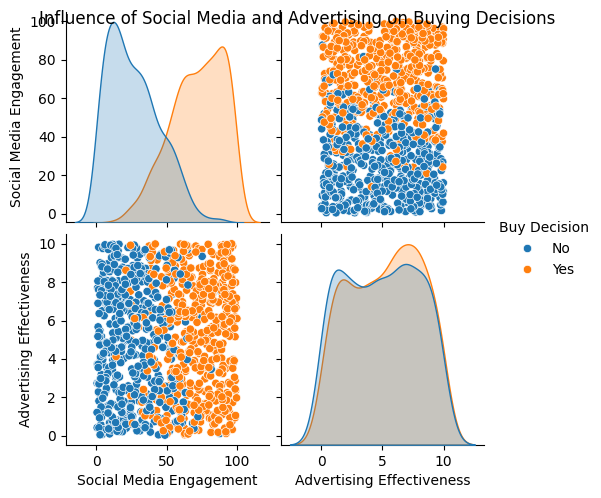

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
social_media_engagement = np.random.uniform(0, 100, n_samples)
advertising_effectiveness = np.random.uniform(0, 10, n_samples)
buy_decision_prob = 0.3 * social_media_engagement + 0.2 * advertising_effectiveness + np.random.normal(0, 5, n_samples)
buy_decision = np.where(buy_decision_prob > np.median(buy_decision_prob), 'Yes', 'No')

# Create DataFrame
data = pd.DataFrame({
    'Social Media Engagement': social_media_engagement,
    'Advertising Effectiveness': advertising_effectiveness,
    'Buy Decision': buy_decision
})

# Visualize the influence of social media engagement and advertising effectiveness on buying decisions
sns.pairplot(data, hue='Buy Decision', diag_kind='kde')
plt.suptitle('Influence of Social Media and Advertising on Buying Decisions')
plt.show()


According to our cluster visualization, it seems that the clusters are formed based on estimated salary way more than age. Thus, it seems that estimated salary must be a very strong indicator of cluster fit or formation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



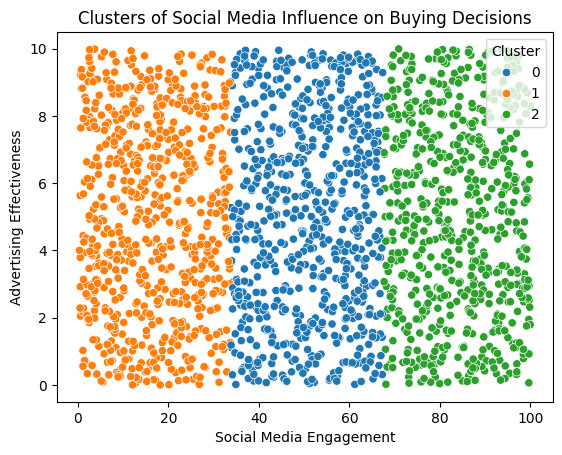

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 2000
social_media_engagement = np.random.uniform(0, 100, n_samples)
advertising_effectiveness = np.random.uniform(0, 10, n_samples)
buy_decision_prob = 0.3 * social_media_engagement + 0.2 * advertising_effectiveness + np.random.normal(0, 5, n_samples)
buy_decision = np.where(buy_decision_prob > np.median(buy_decision_prob), 'Yes', 'No')

# Create DataFrame
data = pd.DataFrame({
    'Social Media Engagement': social_media_engagement,
    'Advertising Effectiveness': advertising_effectiveness,
    'Buy Decision': buy_decision
})

# Apply K-means clustering
X = data.drop('Buy Decision', axis=1)  # Features
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(x='Social Media Engagement', y='Advertising Effectiveness', hue='Cluster', data=data, palette='tab10')
plt.title('Clusters of Social Media Influence on Buying Decisions')
plt.xlabel('Social Media Engagement')
plt.ylabel('Advertising Effectiveness')
plt.show()


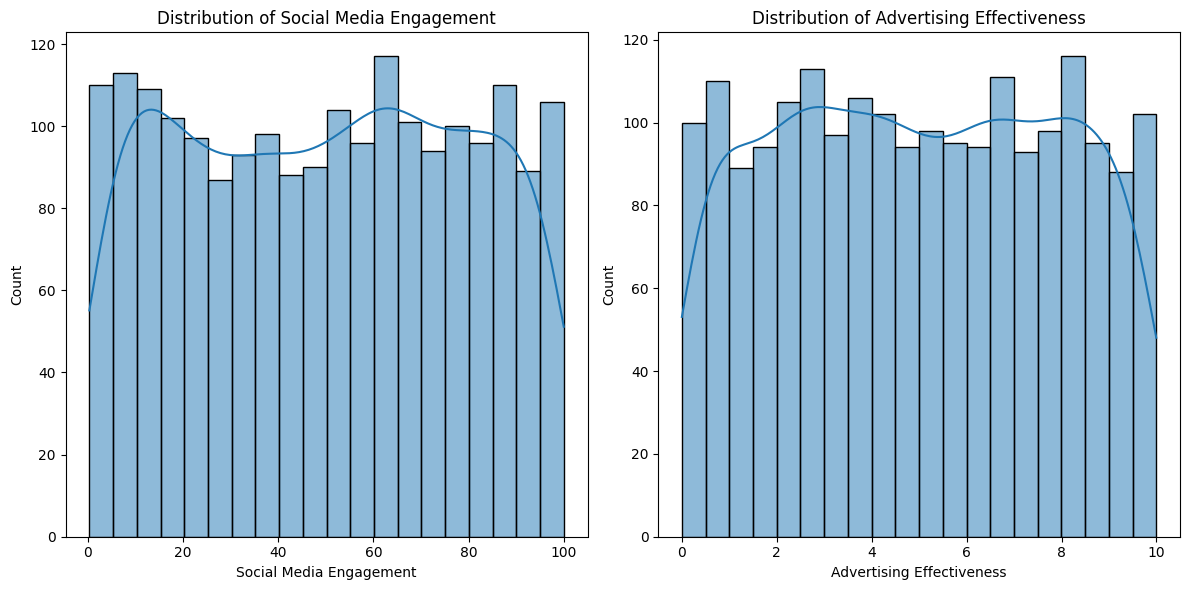

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Social Media Engagement'], bins=20, kde=True)
plt.title('Distribution of Social Media Engagement')

plt.subplot(1, 2, 2)
sns.histplot(data['Advertising Effectiveness'], bins=20, kde=True)
plt.title('Distribution of Advertising Effectiveness')

plt.tight_layout()
plt.show()


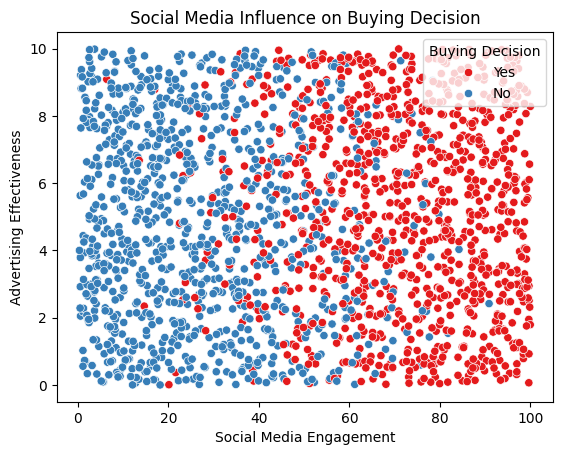

In [24]:
sns.scatterplot(x='Social Media Engagement', y='Advertising Effectiveness', hue='Buy Decision', data=data, palette='Set1')
plt.title('Social Media Influence on Buying Decision')
plt.xlabel('Social Media Engagement')
plt.ylabel('Advertising Effectiveness')
plt.legend(title='Buying Decision')
plt.show()


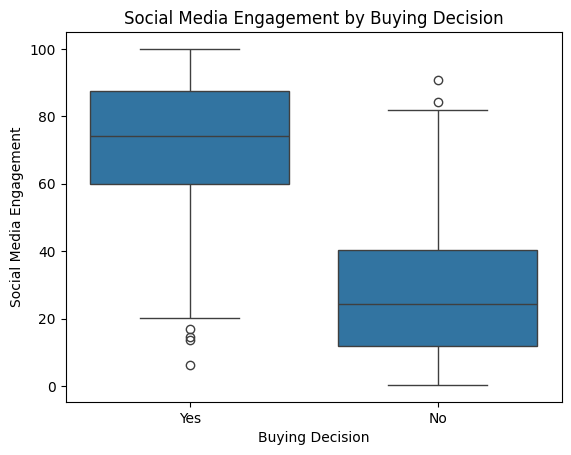

In [25]:
sns.boxplot(x='Buy Decision', y='Social Media Engagement', data=data)
plt.title('Social Media Engagement by Buying Decision')
plt.xlabel('Buying Decision')
plt.ylabel('Social Media Engagement')
plt.show()


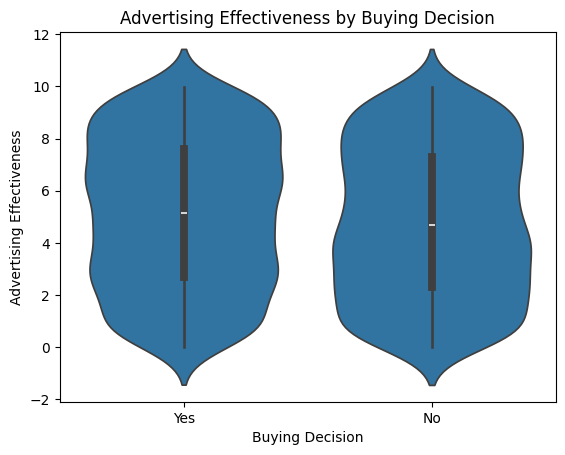

In [26]:
sns.violinplot(x='Buy Decision', y='Advertising Effectiveness', data=data)
plt.title('Advertising Effectiveness by Buying Decision')
plt.xlabel('Buying Decision')
plt.ylabel('Advertising Effectiveness')
plt.show()


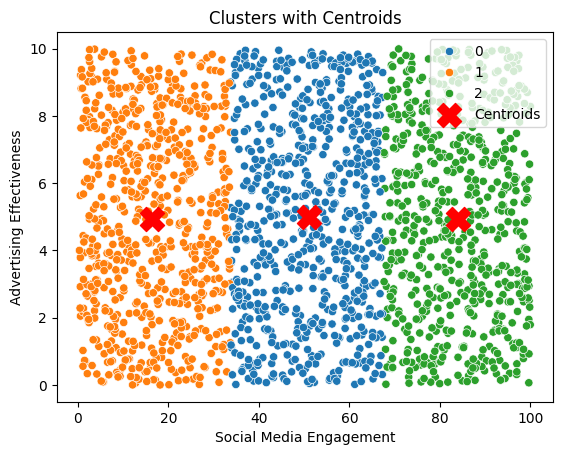

In [27]:
sns.scatterplot(x='Social Media Engagement', y='Advertising Effectiveness', hue='Cluster', data=data, palette='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Social Media Engagement')
plt.ylabel('Advertising Effectiveness')
plt.legend()
plt.show()


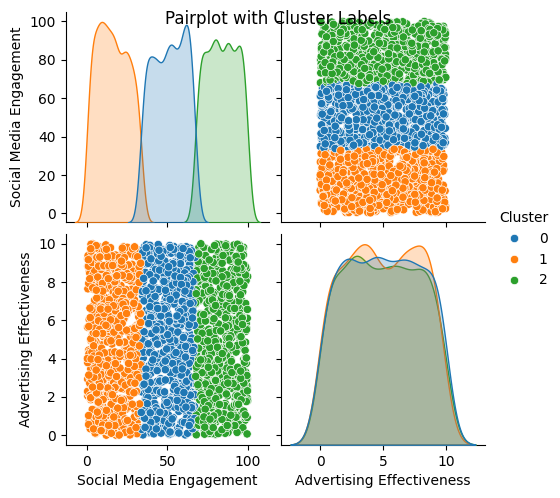

In [28]:
sns.pairplot(data, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Pairplot with Cluster Labels')
plt.show()


<ipython-input-29-eaedbef9a849>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




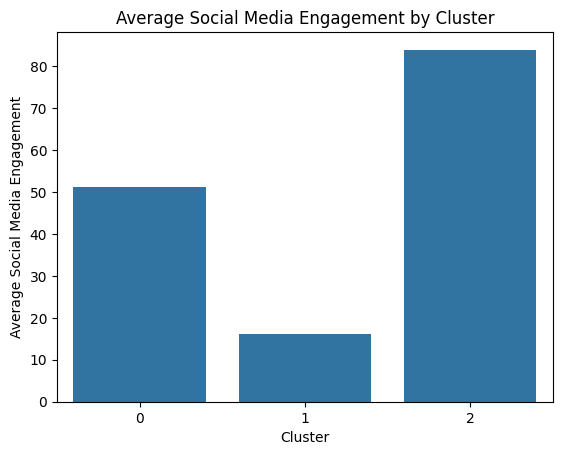

In [29]:
sns.barplot(x='Cluster', y='Social Media Engagement', data=data, estimator=np.mean, ci=None)
plt.title('Average Social Media Engagement by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Social Media Engagement')
plt.show()


<ipython-input-30-88caeb6a35c4>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




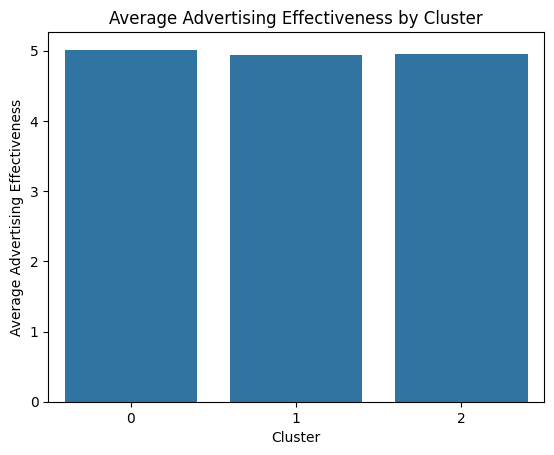

In [30]:
sns.barplot(x='Cluster', y='Advertising Effectiveness', data=data, estimator=np.mean, ci=None)
plt.title('Average Advertising Effectiveness by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Advertising Effectiveness')
plt.show()


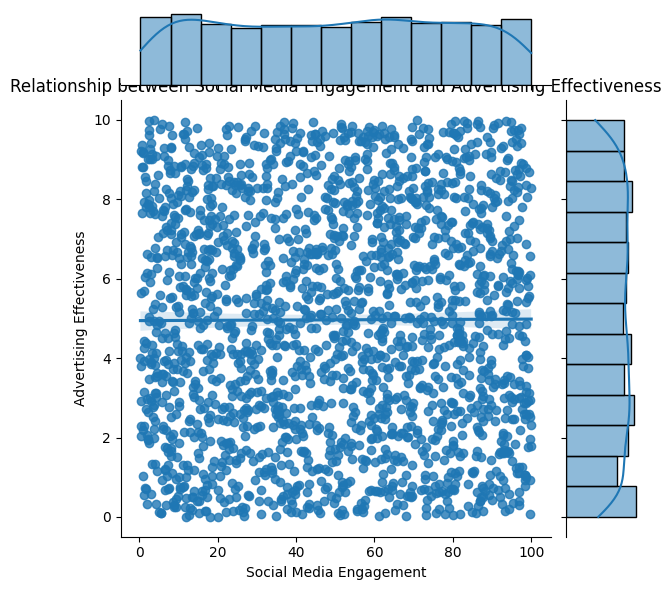

In [31]:
sns.jointplot(x='Social Media Engagement', y='Advertising Effectiveness', data=data, kind='reg')
plt.title('Relationship between Social Media Engagement and Advertising Effectiveness')
plt.show()


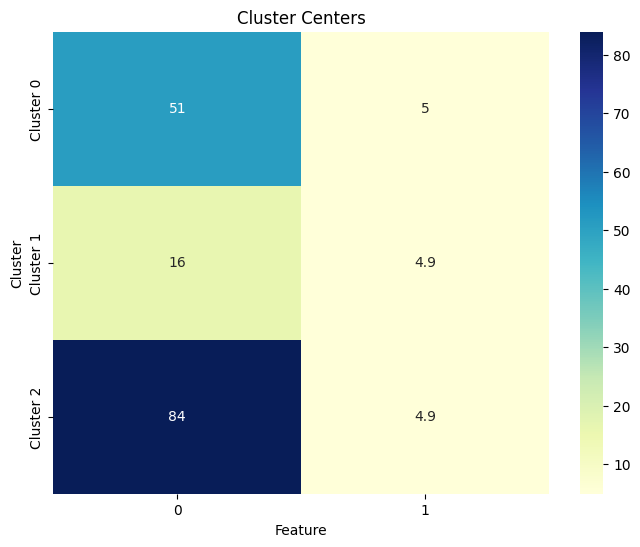

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(kmeans.cluster_centers_, annot=True, cmap='YlGnBu', yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Cluster Centers')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()
